In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

sns.set(
    font_scale = 2,
    style='whitegrid',
    rc={'figure.figsize' : (20,7)}
)

# Анализ цен на Avocado Haas в США

In [99]:
avocado_mean = pd.read_csv(avocado_mean)
avocado_full = pd.read_csv(avocado_full)

### Описание данных
*В датафрейме находятся данные не за каждый день, а за конец каждой недели*

**`avocado_mean`** - данные только по средним ценам за авокадо<br>
**Date** — дата <br>
**AveragePrice** — средняя цена одного авокадо <br><br>

**`avocado_full`** - полные данные о продажах авокадо в США<br>
*Нужны будут следующие колонки для анализа цен авокадо типа органик в Чикаго* <br>
**type** - обычный или органический <br>
**region** - город или регион the city or region of the observation <br>

In [11]:
avocado_mean.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


#### Проверим данные на ошибки

In [12]:
avocado_mean.describe()

,AveragePrice
count,169.000000
mean,1.405988
std,0.151713
min,1.144722
25%,1.300926
50%,1.385185
75%,1.482315
max,1.871296


In [14]:
avocado_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [15]:
avocado_mean.duplicated().sum()

0

**Вывод** <br>
Дубликатов и нулевых строк в таблице нет. Значения средних цен по дням лежит в диапазоне 1,14-1,87 USD, среднее - 1,41 USD, медианное значение 1,38 USD

### 1. Скользящее среднее цены авокадо (rolling)

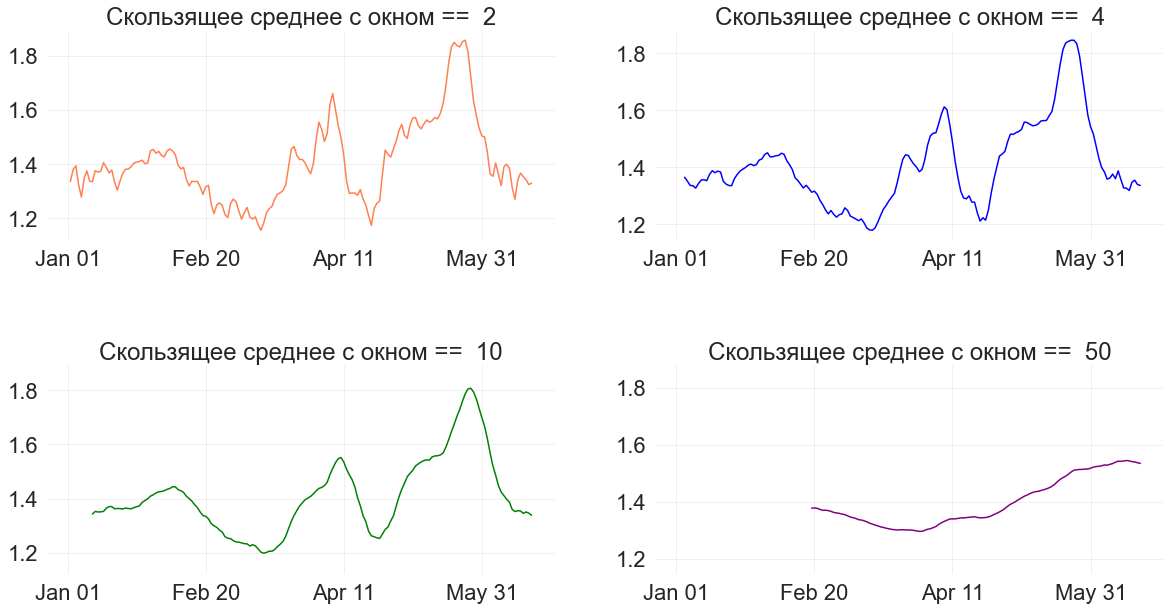

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
for ax in axes.flatten():
    ax.set_frame_on(False)  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip(['2','4','10','50'], axes.flatten()):
    ax.set(title='Скользящее среднее с окном ==  {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

In [88]:
print('Диапазон значений с окном 2 равен',avocado_mean.rolling(2).mean().min().round(2)[0], '-', avocado_mean.rolling(2).mean().max().round(2)[0])
print('Диапазон значений с окном 4 равен',avocado_mean.rolling(4).mean().min().round(2)[0], '-', avocado_mean.rolling(4).mean().max().round(2)[0])
print('Диапазон значений с окном 10 равен',avocado_mean.rolling(10).mean().min().round(2)[0], '-', avocado_mean.rolling(10).mean().max().round(2)[0])
print('Диапазон значений с окном 50 равен',avocado_mean.rolling(50).mean().min().round(2)[0], '-', avocado_mean.rolling(50).mean().max().round(2)[0])

Диапазон значений с окном 2 равен 1.16 - 1.86
Диапазон значений с окном 4 равен 1.18 - 1.84
Диапазон значений с окном 10 равен 1.2 - 1.81
Диапазон значений с окном 50 равен 1.3 - 1.54


### 2. Экспоненциальное скользящее среднее
*Дополнительный способ*

In [89]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

<AxesSubplot:>

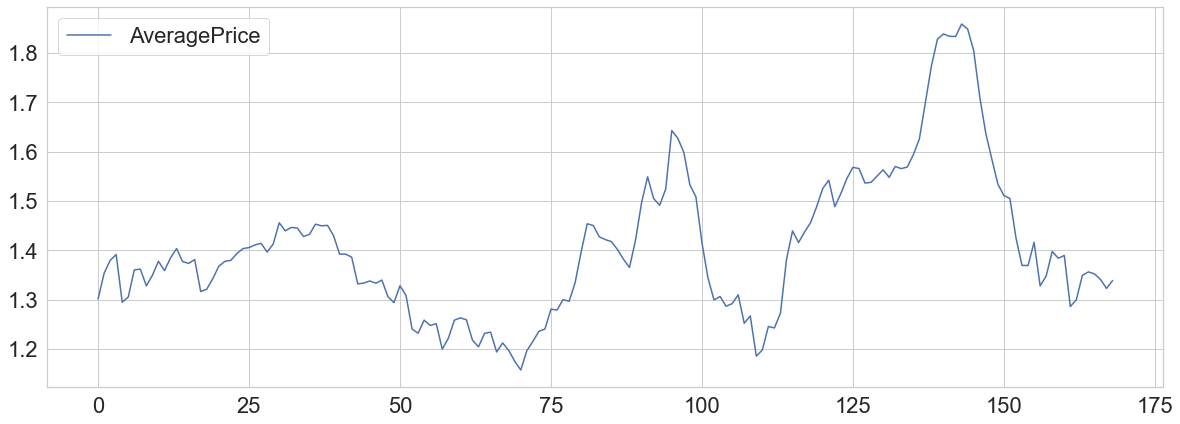

In [91]:
avocado_ewm.plot()

In [98]:
print('Диапазон экспоненциального скользящего среднего',avocado_ewm.min().round(2)[0], '-', avocado_ewm.max().round(2)[0])

Диапазон экспоненциального скользящего среднего 1.16 - 1.86


### 3. Посчитаем скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4 для типа Organic в Чикаго

In [135]:
#avocado_Chicago_organic = avocado_full.
avocado_Chicago_organic = avocado_full[["type","region","AveragePrice","Date"]].copy().query("type == 'organic' & region == 'Chicago'").set_index('Date')

In [136]:
avocado_Chicago_organic.head()

,type,region,AveragePrice
Date,,,
2015-01-04,organic,Chicago,1.49
2015-01-11,organic,Chicago,1.79
2015-01-18,organic,Chicago,1.81
2015-01-25,organic,Chicago,1.83
2015-02-01,organic,Chicago,1.52


<AxesSubplot:xlabel='Date'>

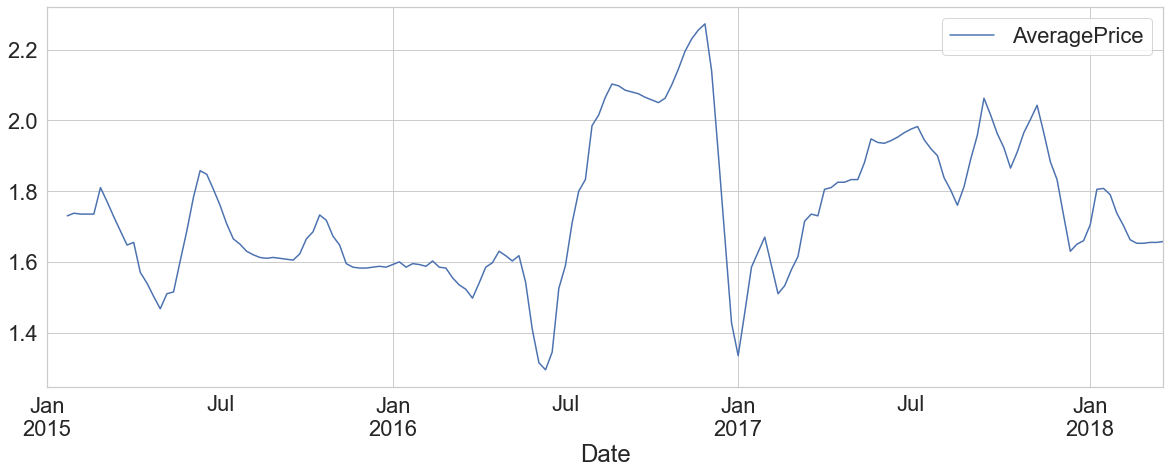

In [153]:
avocado_Chicago_organic.rolling(4).mean().groupby('Date').agg({'AveragePrice': 'mean'}).plot()

<AxesSubplot:xlabel='Date'>

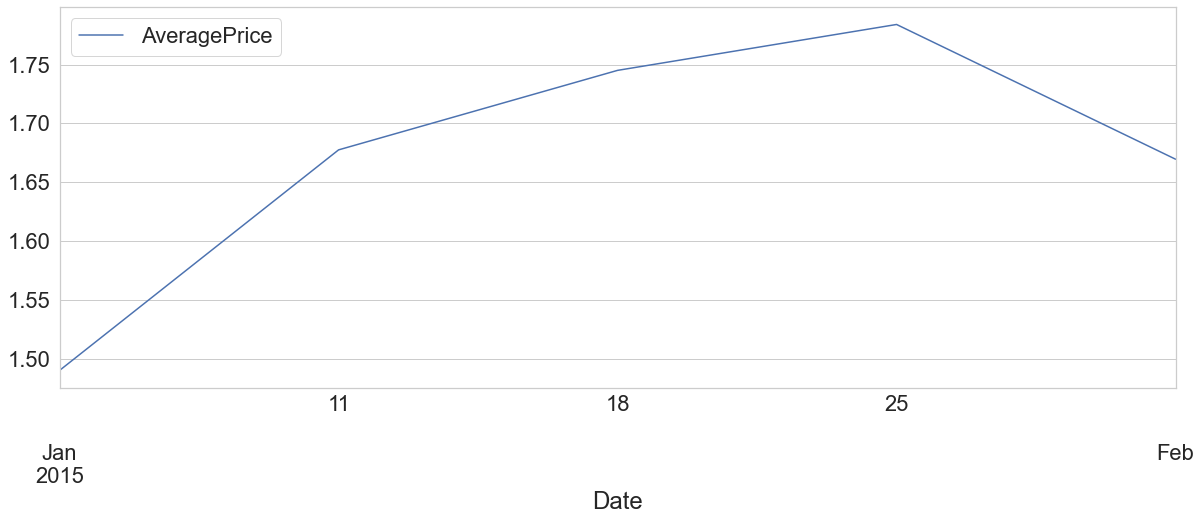

In [152]:
avocado_Chicago_organic.ewm(span=4).mean().groupby('Date').agg({'AveragePrice': 'mean'}).head().plot()

In [149]:
avocado_Chicago_organic.ewm(span=4).mean().round(3).groupby('Date').agg({'AveragePrice': 'mean'}).head()

,AveragePrice
Date,
2015-01-04,1.490
2015-01-11,1.678
2015-01-18,1.745
2015-01-25,1.784
2015-02-01,1.670


**Вывод** <br>
Ряд, полученный с помощью **экспоненциального скользящего среднего** на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна **2.102**, что 
**больше** чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось **1.562**, и было **больше** чем при использовании rolling(), для которого значение было равно **1.532**